<a href="https://colab.research.google.com/github/Jesus21A/FromRawDataToIntelligentPredictionsv2/blob/main/FromRawDataToIntelligentPredictionsv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso 1: Configurando la API de Kaggle...
La API de Kaggle ya parece estar configurada.

Paso 2: 'powerconsumption.csv' no encontrado. Intentando descargar desde Kaggle...
Dataset descargado y descomprimido exitosamente.

Paso 3: Cargando y preparando los datos...

Datos listos. Variable objetivo: PowerConsumption_Zone1
Características utilizadas: ['PowerConsumption_Zone1', 'Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'hour', 'day_of_week']

Paso 4: Secuencias creadas. Usando 144 pasos para predecir 6.
Forma de X (entradas): (52267, 144, 10)
Forma de y (salidas): (52267, 6)

Paso 5: Construyendo el modelo híbrido Conv1D-LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Modelo_Hibrido_V2_Definitivo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 142, 64)        │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 71, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,290 (98.79 KB)

 Trainable params: 25,290 (98.79 KB)

 Non-trainable params: 0 (0.00 B)


Paso 6: Entrenando el modelo...
Epoch 1/20
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - loss: 0.0206 - val_loss: 0.0021
Epoch 2/20
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/20
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 4/20
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - loss: 9.8774e-04 - val_loss: 0.0025
Epoch 5/20
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 8.9443e-04 - val_loss: 8.7998e-04
Epoch 6/20
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - loss: 8.3586e-04 - val_loss: 0.0011
Epoch 7/20
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - loss: 7.9109e-04 - val_loss: 8.5094e-04
Epoch 8/20
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - loss: 7.1382e-04 - val_loss: 0.0013
Epoch 9/20
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 6.7878e-04 - val_loss: 9.5537e-04
Epoch 10/20
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 6.2903e-04 - val_loss: 9.4169e-04
Epoch 11/20
1307/1307 

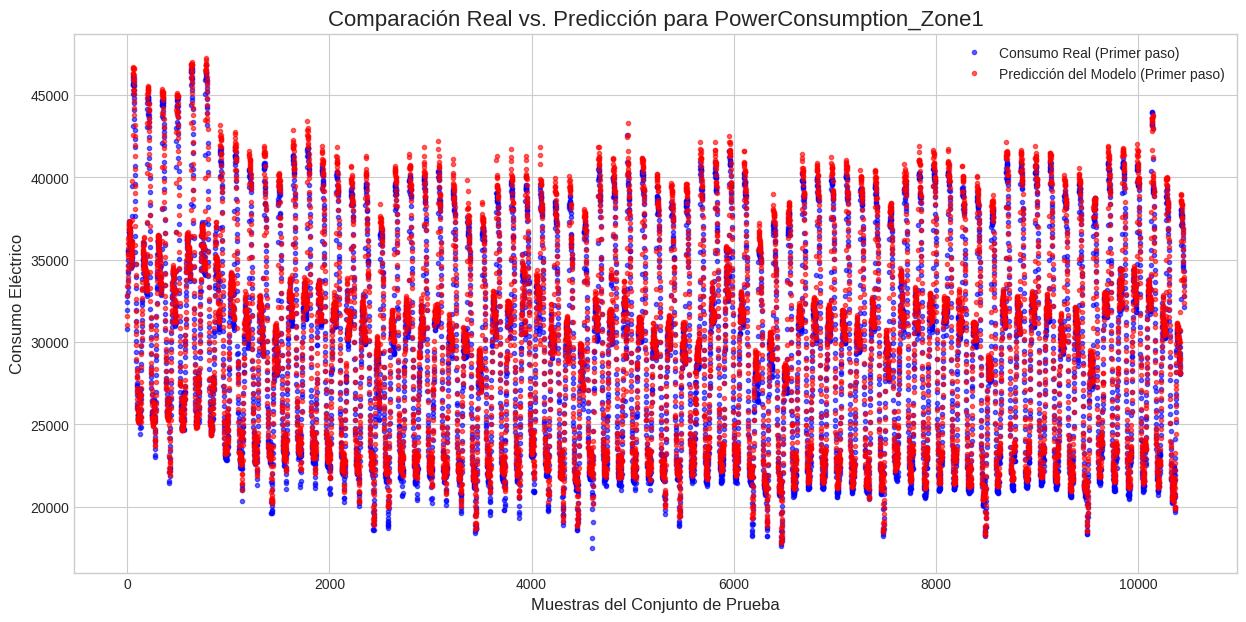

In [1]:
"""
Implementación V2 Definitiva: De Kaggle a la Predicción

Este script fusiona la preparación del entorno de la V1 con las mejoras
de la V2, creando un flujo de trabajo completo y automatizado.

- PASOS 1-2: Configuran el entorno de Kaggle, descargan y descomprimen el
  dataset 'powerconsumption.csv' automáticamente.
- PASOS 3-7: Aplican las mejoras de la V2 sobre los datos reales:
    1.  Análisis Multivariado: Utiliza todas las variables del dataset.
    2.  Ingeniería de Características: Extrae 'hora' y 'día de la semana'.
    3.  Modelo Híbrido (Conv1D + LSTM): Implementa la arquitectura avanzada.
"""
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ==============================================================================
# PASO 1: CONFIGURAR LA API DE KAGGLE
# ==============================================================================
print("Paso 1: Configurando la API de Kaggle...")

# Solo ejecuta los comandos si no se ha hecho antes
if not os.path.exists('/root/.kaggle'):
    # En un entorno como Colab, 'os.system' ejecuta comandos de terminal.
    # Asegúrate de que tu 'kaggle.json' está en el directorio de trabajo.
    if os.path.exists('kaggle.json'):
        os.system('pip install -q kaggle')
        os.system('mkdir -p ~/.kaggle')
        os.system('cp kaggle.json ~/.kaggle/')
        os.system('chmod 600 ~/.kaggle/kaggle.json')
        print("API de Kaggle configurada exitosamente.")
    else:
        print("ADVERTENCIA: No se encontró 'kaggle.json'. Saltando la configuración de la API.")
        print("Asegúrate de tener 'powerconsumption.csv' en el directorio.")
else:
    print("La API de Kaggle ya parece estar configurada.")


# ==============================================================================
# PASO 2: DESCARGAR Y DESCOMPRIMIR EL DATASET
# ==============================================================================
csv_filename = 'powerconsumption.csv'

if not os.path.exists(csv_filename):
    print(f"\nPaso 2: '{csv_filename}' no encontrado. Intentando descargar desde Kaggle...")
    os.system('kaggle datasets download -d fedesoriano/electric-power-consumption')
    os.system('unzip -o electric-power-consumption.zip')
    if os.path.exists(csv_filename):
        print("Dataset descargado y descomprimido exitosamente.")
    else:
        print("Error: La descarga falló. Por favor, descarga 'powerconsumption.csv' manualmente.")
        exit()
else:
    print(f"\nPaso 2: El archivo '{csv_filename}' ya existe. Saltando la descarga.")

# Citamos al autor del dataset en Kaggle
# fedesoriano. (August 2022). Electric Power Consumption.
# Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption.

# ==============================================================================
# PASO 3: CARGA DE DATOS Y FEATURE ENGINEERING (Lógica V2)
# ==============================================================================
print("\nPaso 3: Cargando y preparando los datos...")
df = pd.read_csv(csv_filename)

# Preprocesamiento básico
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime').sort_index()

# **Feature Engineering**: Creamos características a partir del tiempo
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek

# **Análisis Multivariado**: Definimos la variable objetivo
TARGET_VARIABLE = 'PowerConsumption_Zone1'

# Reordenamos las columnas para que el objetivo sea el primero
feature_columns = [col for col in df.columns if col != TARGET_VARIABLE]
ordered_columns = [TARGET_VARIABLE] + feature_columns
df = df[ordered_columns]

# Normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df)

print("\nDatos listos. Variable objetivo:", TARGET_VARIABLE)
print("Características utilizadas:", df.columns.tolist())


# ==============================================================================
# PASO 4: PREPARACIÓN DE SECUENCIAS PARA EL MODELO (Lógica V2)
# ==============================================================================
def create_sequences(data, n_steps_in, n_steps_out, target_col_index=0):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x = data[i:end_ix, :]
        seq_y = data[end_ix:out_end_ix, target_col_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Usaremos 1 día de datos (144 puntos) para predecir la siguiente hora (6 puntos)
n_steps_in = 144
n_steps_out = 6
n_features = scaled_features.shape[1]

X, y = create_sequences(scaled_features, n_steps_in, n_steps_out)
print(f"\nPaso 4: Secuencias creadas. Usando {n_steps_in} pasos para predecir {n_steps_out}.")
print("Forma de X (entradas):", X.shape)
print("Forma de y (salidas):", y.shape)


# ==============================================================================
# PASO 5: CONSTRUCCIÓN DEL MODELO HÍBRIDO CONV1D + LSTM (Lógica V2)
# ==============================================================================
print("\nPaso 5: Construyendo el modelo híbrido Conv1D-LSTM...")

model = Sequential(name="Modelo_Hibrido_V2_Definitivo")
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse')
model.summary()


# ==============================================================================
# PASO 6: ENTRENAMIENTO Y PREDICCIÓN (Lógica V2)
# ==============================================================================
split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

print("\nPaso 6: Entrenando el modelo...")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

print("\nRealizando predicciones en el conjunto de prueba...")
predictions_scaled = model.predict(X_test)


# ==============================================================================
# PASO 7: EVALUACIÓN Y VISUALIZACIÓN DE RESULTADOS (Lógica V2)
# ==============================================================================
print("\nPaso 7: Evaluando y visualizando los resultados...")

def inverse_transform(scaled_data, original_scaler):
    """
    Función para des-normalizar los datos. Es crucial para interpretar los resultados.
    Recibe datos escalados (predicciones o reales) y el scaler original.
    """
    # Tomamos solo el primer paso de la predicción para la gráfica (ej: el valor de t+1)
    data_to_inverse = scaled_data[:, 0]
    n_samples = len(data_to_inverse)
    n_features = original_scaler.n_features_in_

    # Creamos un array vacío con la forma original que espera el scaler
    dummy_array = np.zeros((n_samples, n_features))
    # Ponemos nuestros datos en la primera columna (la columna objetivo)
    dummy_array[:, 0] = data_to_inverse
    # Aplicamos la transformación inversa
    return original_scaler.inverse_transform(dummy_array)[:, 0]

predictions = inverse_transform(predictions_scaled, scaler)
actuals = inverse_transform(y_test, scaler)

# Calcular métricas de error
mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")

# Visualización de los resultados
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 7))
plt.plot(actuals, label='Consumo Real (Primer paso)', color='blue', marker='.', linestyle='None', alpha=0.6)
plt.plot(predictions, label='Predicción del Modelo (Primer paso)', color='red', marker='.', linestyle='None', alpha=0.6)
plt.title(f'Comparación Real vs. Predicción para {TARGET_VARIABLE}', fontsize=16)
plt.xlabel('Muestras del Conjunto de Prueba', fontsize=12)
plt.ylabel('Consumo Eléctrico', fontsize=12)
plt.legend()
plt.show()

